In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
root_addr=r'D:\Data warehouse\Face_Picture\eye_tracker_train_and_val'

In [3]:
fname=os.listdir(root_addr)

In [4]:
fname

['train_eye_left.npy',
 'train_eye_right.npy',
 'train_face.npy',
 'train_face_mask.npy',
 'train_y.npy',
 'val_eye_left.npy',
 'val_eye_right.npy',
 'val_face.npy',
 'val_face_mask.npy',
 'val_y.npy']

In [10]:
fmask=np.load(os.path.join(root_addr,fname[-2]))
face=np.load(os.path.join(root_addr,fname[-3]))

In [11]:
face.shape,fmask.shape

((5000, 64, 64, 3), (5000, 25, 25))

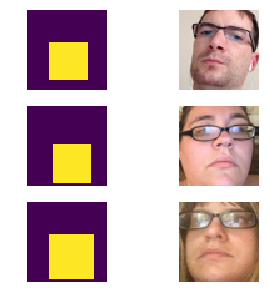

In [25]:
plt.figure(figsize=(5,5))
index=np.random.choice(range(5000),6,replace=False)
for i in range(3):
    plt.subplot(3,2,i*2+1)
    plt.imshow(fmask[index[2*i]]*255)
    plt.axis('off')
    plt.subplot(3,2,i*2+2)
    plt.imshow(face[2*i])
    plt.axis('off')
plt.show()

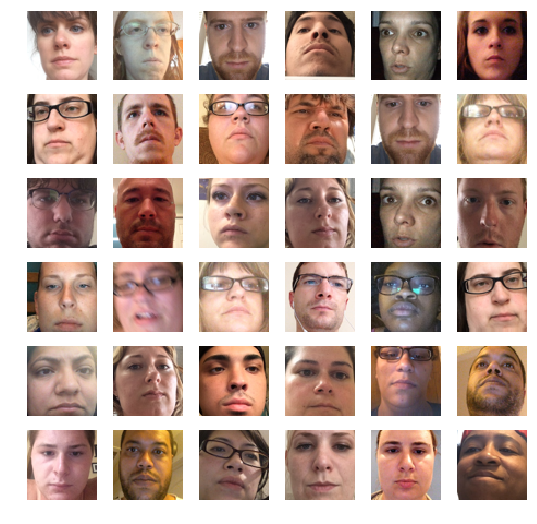

In [7]:
plt.figure(figsize=(9,9))
mask=np.random.choice(range(48000),36,replace=False)
for i,j in enumerate(mask):
    plt.subplot(6,6,i+1)
    plt.imshow(a[j].astype('uint8'))
    #plt.title(str(j))
    plt.axis('off')
plt.show()

In [8]:
b=np.load(os.path.join(root_addr,fname[4]))

In [9]:
b.shape

(48000, 2)

In [10]:
b[29023]

array([-0.54150369, -6.48155167])

In [11]:
data_counter={'left_up':[],'right_up':[],
             'left_down':[],'right_dowm':[],
             'mid':[]}

In [12]:
for i,data_ in enumerate(b):
    x_,y_=data_
    if x_<0:
        if y_<0:
            data_counter['left_down'].append(i)
        else:
            data_counter['left_up'].append(i)
    elif x_>0:
        if y_<0:
            data_counter['right_dowm'].append(i)
        else:
            data_counter['right_up'].append(i)
    else:
        data_counter['mid'].append(i)

In [13]:
for i in data_counter:
    print(i,len(data_counter[i]))

mid 876
right_dowm 14989
left_down 15168
left_up 7956
right_up 9011


right_up


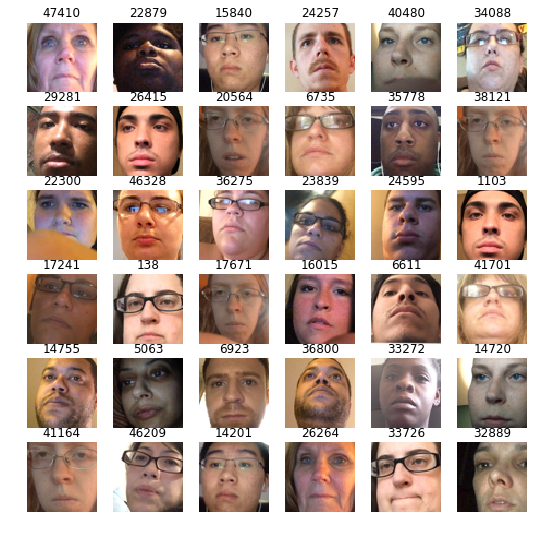

right_dowm


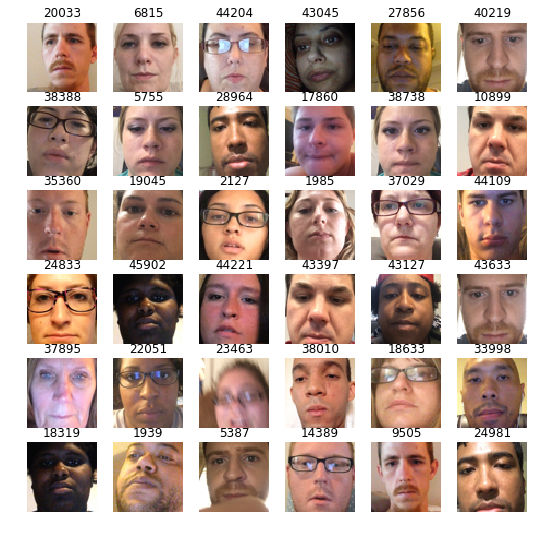

left_up


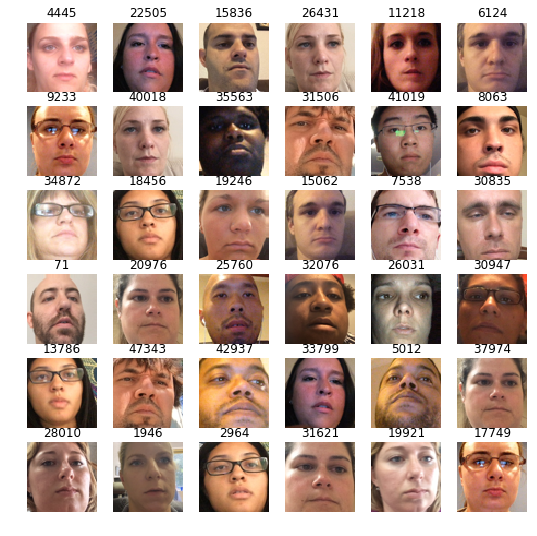

left_down


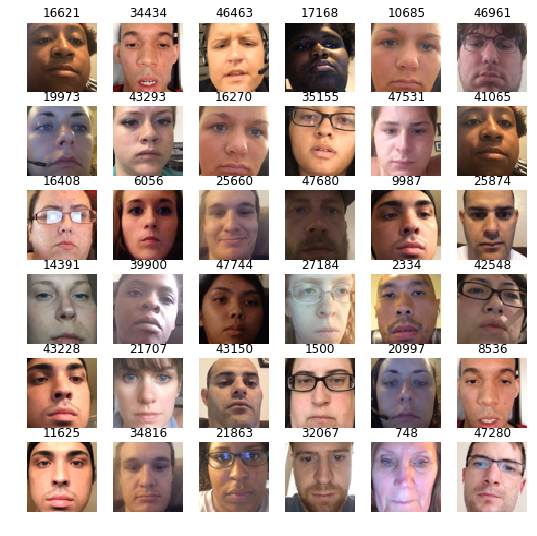

mid


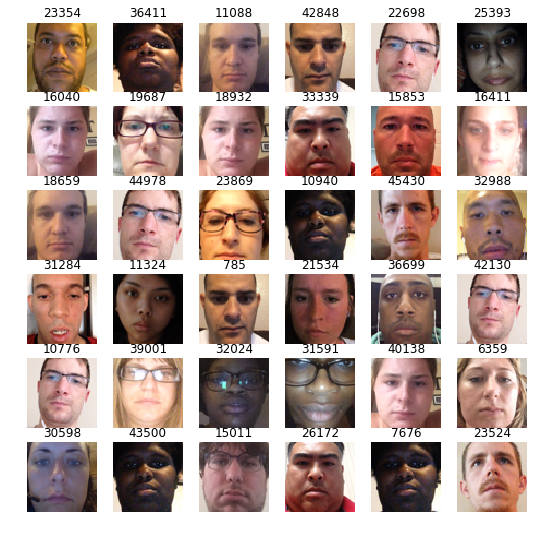

In [18]:
for name in ['right_up','right_dowm','left_up','left_down','mid']:
    plt.figure(figsize=(9,9))
    print(name)
    mask=np.random.choice(data_counter[name],36,replace=False)
    for i,j in enumerate(mask):
        plt.subplot(6,6,i+1)
        plt.imshow(a[j].astype('uint8'))
        plt.title(str(j))
        plt.axis('off')
    plt.show()

In [ ]:
data_counter['mid']

In [ ]:
plt.plot(range(len(data_counter['mid'])),data_counter['mid'],'*')
plt.show()

In [22]:
t_=np.concatenate((b[0].reshape(1,-1),b[1].reshape(1,-1)),axis=1)

In [24]:
t_

array([[ 2.45016757,  0.8047622 , -4.23377174, -2.44275845]])